<a href="https://colab.research.google.com/github/smarthost1/HRClassification/blob/main/Tuberculosis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv ('tuberculosis_xray_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis


In [43]:
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Chest_Pain,0
Cough_Severity,0
Breathlessness,0
Fatigue,0
Weight_Loss,0
Fever,0
Night_Sweats,0


In [44]:
df.describe()

,Age,Cough_Severity,Breathlessness,Fatigue,Weight_Loss
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,53.467450,4.491350,2.003450,4.508450,7.455281
std,20.773984,2.864723,1.417123,2.881552,4.339864
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,2.000000,1.000000,2.000000,3.640000
50%,53.000000,4.000000,2.000000,5.000000,7.490000
75%,71.000000,7.000000,3.000000,7.000000,11.200000
max,89.000000,9.000000,4.000000,9.000000,15.000000


# Violin Plot - Age Distribution by Gender

<ipython-input-45-880ada706600>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y="Age", data=df, palette="muted")


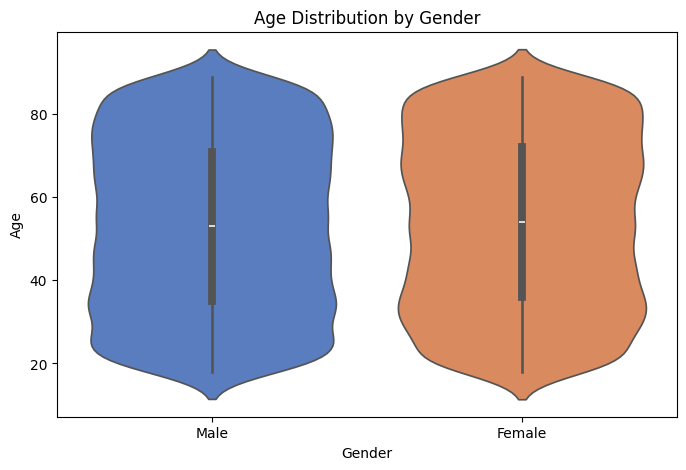

In [45]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Gender", y="Age", data=df, palette="muted")
plt.title("Age Distribution by Gender")
plt.show()

# Stacked Bar Chart - Gender Distribution by Age Groups

<ipython-input-46-6c1c383bc1c2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df.groupby(["Age_Group", "Gender"]).size().unstack()


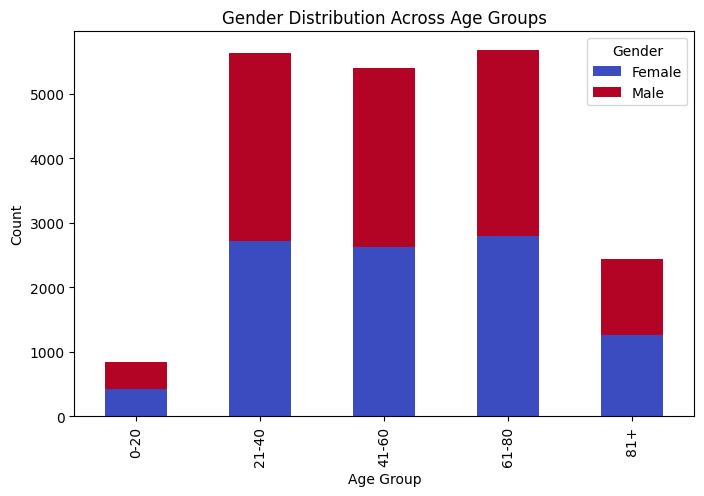

In [46]:
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 20, 40, 60, 80, 100], labels=["0-20", "21-40", "41-60", "61-80", "81+"])
age_gender_counts = df.groupby(["Age_Group", "Gender"]).size().unstack()

age_gender_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")
plt.title("Gender Distribution Across Age Groups")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.legend(title="Gender")
plt.show()

# Data Encoding

In [47]:
df.select_dtypes('object').head()

,Patient_ID,Gender,Chest_Pain,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,Male,Yes,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,Female,Yes,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,Male,No,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,Female,Yes,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,Male,No,High,Yes,Low,No,Never,Yes,Tuberculosis


In [48]:
df=df.drop(['Patient_ID','Age_Group'],axis=1)
df.head()

,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis


In [49]:
from sklearn.preprocessing import LabelEncoder
label_features = ["Gender", "Smoking_History", "Previous_TB_History", "Class","Chest_Pain","Night_Sweats","Blood_in_Sputum"]
for col in label_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [50]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_features = [["Fever", "Sputum_Production"]]
for col in ordinal_features:
    ol = OrdinalEncoder()
    df[col] = ol.fit_transform(df[col])

In [51]:
df.head()

,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,69,1,1,1,2,3,2.37,2.0,1,2.0,1,1,1,0
1,32,0,1,3,0,9,6.09,2.0,0,2.0,0,0,1,0
2,89,1,0,7,0,3,2.86,1.0,1,2.0,0,0,0,1
3,78,0,1,2,0,6,4.57,2.0,0,0.0,1,2,1,1
4,38,1,0,7,2,5,13.86,0.0,1,1.0,0,2,1,1


# data Splitting

In [89]:
X=df.drop('Class',axis=1)
y=df['Class']

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Evaluating models

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    'LogisticRegression': LogisticRegression(C=0.1, solver='liblinear', penalty='l1'),
    'DecisionTree': DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=2),
    'RandomForest': RandomForestClassifier(min_samples_leaf=1,min_samples_split=10,max_depth=10,n_estimators=20),
    'KNN': KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='uniform'),
    'SVM': SVC(C=1,kernel='rbf',gamma='auto'),
    'NaiveBayes': GaussianNB(var_smoothing=1e-9),

}

In [101]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


for i in models:
    obj = models[i]
    obj.fit(X_train, y_train)
    obj_pred = obj.predict(X_test)


    accuracy = accuracy_score(y_test, obj_pred>0.5,)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')


    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)


print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                Model  Accuracy  Precision   Recall  F1-Score
0  LogisticRegression   0.69650   0.485112  0.69650  0.571898
1        DecisionTree   0.69425   0.545541  0.69425  0.572178
2        RandomForest   0.69650   0.485112  0.69650  0.571898
3                 KNN   0.68150   0.583213  0.68150  0.586138
4                 SVM   0.69650   0.485112  0.69650  0.571898
5          NaiveBayes   0.69650   0.485112  0.69650  0.571898


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
